<a href="https://colab.research.google.com/github/SanghunOh/study_machinglearning/blob/main/codes/sanghunoh/9%EA%B0%95_LDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 선형변환 의한 특징 추출 : 불필요 정보 제거로 핵심 정보만 뽑는 한 기술
$ Y=W^TX=[W^Tx_1,W^Tx_2,...,W^Tx_n] $
$
X = [x_1,x_2,...,x_n] → μ_x(\text{=0 가정,Centering:}X-\mu_x1^T), Σ_x \\
\text{특징 데이터 집합 Y 통계량} \\
\begin{align}
μ_y=\frac{1}{N} \sum_{i=1}^{N} W^Tx_i=W^T\mu_x \\
Σ_y=\frac{1}{N}YY^T=\frac{1}{N}(W^TX)(W^TX)^T=\frac{1}{N}W^T(XX^T)W\frac{1}{N}W^T Σ_x W \\
\end{align}
→ \text{최종 목적 : 다루기 편하기 위해 Y 공분산이 단위행렬 또는 대각행렬로 만듬.(W를 조정)}
$

$
\text{대각행렬 공분산 얻기 위한 선형 변환} \\
Φ → Σ_x \text{고유벡터 행렬}, Λ → Σ_x \text{고유치를 대각원소로 갖는 행렬} \\
Σ_xΦ=ΦΛ(Φ \text{서로 직교},ΦΦ^T=I) → Σ_x=ΦΛΦ^T \\
Σ_y=W^TΣ_xW = W^T(ΦΛΦ^T)W = Λ \\
Y = Φ^TX → W=Φ\text{(Diagonalization Transform)}
$

$
\text{화이트닝 변환(Whitening Transform) : 기존 복잡한 분포 특성 제거
} \\
Σ_z = W^TΣ_yW = (Λ^{-1/2})TΣ_yΛ^{-1/2} = I \\
W = ΦΛ^{-1/2}
$

In [ ]:
import numpy as np
np.random.seed(50)  # 동일한 수열 발생 위해 설정
X = np.array([[1,2,3,4],[6,7,8,9]])
# X = np.array([2,2])
# W = np.array([1,0]) # 1차원
W = np.array([1,1]) # 2차원
W = np.array([1,1]) # 2차원
W.T @ X

array([ 7,  9, 11, 13])

#create dataset with standardizing

In [ ]:
import numpy as np
row_count = 100

In [ ]:
# Class 1
rand_std_1 = np.random.randn(row_count, 3)
mu_1 = np.array([0,0,0])
sigma_1 = np.array([[9,0,3],[0,1,2],[9,0,2]])
class_1 = rand_std_1 @ np.sqrt(sigma_1) + mu_1
class_1.shape

(100, 3)

In [ ]:
# Class 2
rand_std_2 = np.random.randn(row_count, 3)
mu_2 = np.array([0,4,4])
sigma_2 = np.array([[9,0,3],[0,1,2],[9,0,2]])
class_2 = rand_std_2 @ np.sqrt(sigma_2) + mu_2
class_2.shape

(100, 3)

In [ ]:
# Class 3
rand_std_3 = np.random.randn(row_count, 2)
mu_3 = np.array([0,8])
sigma_3 = np.array([[9,0],[0,1]])
class_3 = rand_std_3 @ np.sqrt(sigma_3) + mu_3
class_3.shape

(100, 2)

In [ ]:
class_list = [class_1, class_2]
class_all = np.vstack(class_list)
class_all.shape

(200, 3)

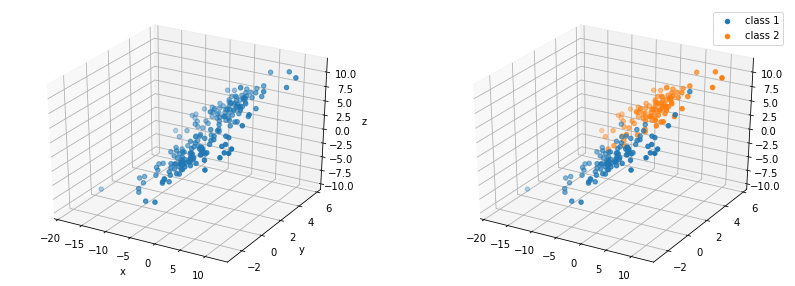

In [ ]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(14,5))
ax = fig.add_subplot(121, projection='3d')
ax.scatter(class_all[:,0],class_all[:,1],class_all[:,2])
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')

ax = fig.add_subplot(122, projection='3d')
for idx, class_number in enumerate(class_list):
  ax.scatter(class_number[:,0], class_number[:,1], class_number[:,2], label='class {}'.format(idx+1))
plt.legend()
plt.show()

# LDA(Linear Discriminant Analysis) : 클래스 라벨을 활용해 선형 변환 차원 축소
+ 분류 적합한 특징 방향
  - 각 클래스들 사이가 멀게 함.
  - 같은 라벨 클레스 분산 작세 함.
+ 문제점
  - 비선형 구조 반영 어려움.(커널법, 비선형 매니폴드법 사용)
  - 작은 샘플집합 문제(Small Sample Set Problem) : 입력차원보다 작은 경우 역행렬 존재 않음.
    - 해결법 : PCA로 차원 축소

##Computing J(w)
$
\begin{align}
J(w) = \frac{w^T(m_1-M_2)(m_1-m_2)^T}{w^T\sum_{k=1}^{2}\sum_{x_i∈C_k}(m_i-M_k)(m_i-m_k)^Tw}
= \frac{w^TS_{between}w}{w^TS_{within}w}
\end{align}
$

In [ ]:
class_1_mu = np.mean(class_1,axis=0)
class_1_sigma = np.cov(class_1.T)
class_2_mu = np.mean(class_2,axis=0)
class_2_sigma = np.cov(class_2.T)

In [ ]:
class_1_mu.shape, class_2_sigma.shape

((3,), (3, 3))

In [ ]:
(class_1_mu-class_2_mu)

array([-0.23538926, -3.86059876, -3.91230399])

In [ ]:
# within scatter
Sw = class_1_sigma + class_2_sigma
# between scatter
Sb = (class_1_mu-class_2_mu).T * (class_1_mu-class_2_mu)
Sw, Sb

(array([[37.50489812,  0.32813582, 20.08162785],
        [ 0.32813582,  1.7759288 ,  2.66284153],
        [20.08162785,  2.66284153, 14.34515627]]),
 array([ 0.0554081 , 14.90422278, 15.30612254]))

In [ ]:
Jcov = Sb * np.linalg.inv(Sw)
Jcov

array([[ 1.47550621e-01,  1.05277084e+02, -7.71285012e+01],
       [ 3.91379261e-01,  2.90877421e+02, -2.06800871e+02],
       [-2.79204878e-01, -2.01370807e+02,  1.47426064e+02]])

##Computing the Eigenvectors and Eigenvalues

In [ ]:
eigen_values, eigen_vectors = np.linalg.eig(Jcov)
# eigen_values.shape, eigen_vectors.shape
eigen_values, eigen_vectors

(array([4.35601679e+02, 1.47582386e-03, 2.84788155e+00]),
 array([[ 2.87022414e-01,  9.99998120e-01, -4.02835240e-01],
        [ 7.85081706e-01,  3.30091821e-05,  5.34172029e-01],
        [-5.48875987e-01,  1.93896718e-03,  7.43225412e-01]]))

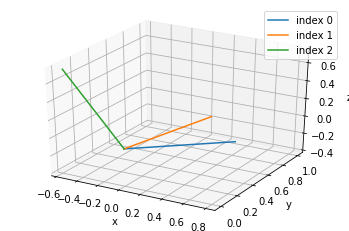

In [35]:
# matplot
fig = plt.figure()
ax = plt.axes(projection='3d')
for idx in range(eigen_values.shape[0]):
  ax.plot([0,eigen_vectors[idx,0]],[0,eigen_vectors[idx,1]],[0,eigen_vectors[idx,2]], label='index {}'.format(idx))
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
plt.legend()
##projection with eigen vector

##projection with eigen vector

In [36]:
# 벡터별 정보 보유율(역순 이유 확인?)
for idx, eigen_value in enumerate(eigen_values):
  print('index {}, rate:{}'.format(idx, eigen_value/sum(eigen_values)*100))

index 0, rate:99.35013099816094
index 1, rate:0.00033659947023551874
index 2, rate:0.6495324023688296


###2 dimenstion projection 

In [37]:
projection_matrix = eigen_vectors.T[0:2]
projection_matrix.shape, projection_matrix, 

((2, 3), array([[ 2.87022414e-01,  7.85081706e-01, -5.48875987e-01],
        [ 9.99998120e-01,  3.30091821e-05,  1.93896718e-03]]))

In [38]:
projected_matrix_1 = class_1 @ projection_matrix.T
projected_matrix_1.shape

(100, 2)

In [39]:
projected_matrix_2 = class_2 @ projection_matrix.T
projected_matrix_2.shape

(100, 2)

In [40]:
eigen_values[0:2]

array([4.35601679e+02, 1.47582386e-03])

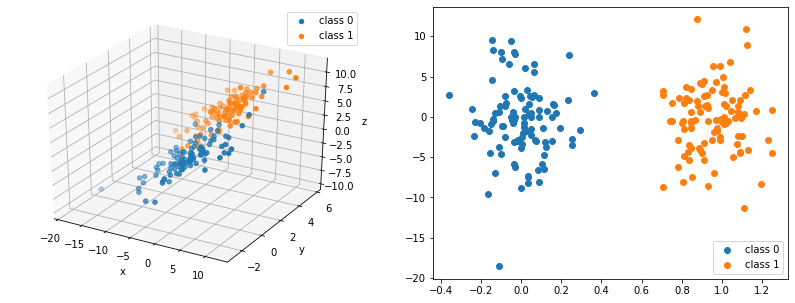

data information rate:99.35046759763118


In [45]:
fig = plt.figure(figsize=(14,5))
ax = fig.add_subplot(121, projection='3d')
for idx, class_group in enumerate([class_1, class_2]):
  ax.scatter(class_group[:,0], class_group[:,1], class_group[:,2], label='class {}'.format(idx))
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
plt.legend()

ax = fig.add_subplot(122)
for idx, projected_matrix_group in enumerate([projected_matrix_1, projected_matrix_2]):
  ax.scatter(projected_matrix_group[:,0], projected_matrix_group[:,1], label='class {}'.format(idx))
plt.legend()
plt.show()
print('data information rate:{}'.format(sum(eigen_values[0:2])/sum(eigen_values)*100))